In [ ]:
%pwd

In [ ]:
%cd .

In [ ]:
# It's recommended to install the necessary packages first in your environment:
import mesa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('./code')
print(os.getcwd())

# MA999 - Agent based modelling 1 - introduction

## MathSys CDT 2023

### Lecturer: Paolo Turrini 
(thanks to Colm Connaughton and Stas Zhydkov) 

## Summary

* What is agent-based modelling?
* Example 1: one-dimensional cellular automata
* Agents.jl - Agent-based modelling in Julia (Mesa: Agent-based modeling in Python)
* Example 2: Schelling Segregation Model
* Mathematical Analysis of the Schelling Segregation Model
* Example 3: Traffic flow and congestion games
* Mathematical analysis of congestion games: Braess' paradox and the price of anarchy
* Example 4: Gaia hypothesis: planetary homeostasis in the Daisyworld model
* Mathematical analysis of the mean field Daisyworld model

## What is agent based modelling?
* An ABM is a model built from multiple autonomous agents that react to their environment (including the other agents) using a predefined set of rules.
* The environment can, in turn, be altered by the actions of the agents.
### Advantages
* Massive flexibility - many of the assumptions of "mathematical" models can be relaxed.
* Easy to simulate and visualise.
* Can handle heterogeneity in a natural way - not all agents need to be identical.
* Often the only option for studying complex adaptive systems.

### Disadvantages
* Potentially large number of parameters and rather under-developed theory for model selection.
* Temptation to favour model "fidelity" over parsimony can lead to inappropriate predictive use.
* Can become computationally expensive.
* Complex ABMs are difficult to understand.

##  Example 1: one-dimensional cellular automata

* "Agents" are nodes on a one-dimensional grid: $G = \{v1, v2, \ldots v_N\}$.
* Each agent has a single "state" attribute,$x_i$, taking values 0 or 1.
* Time proceeds in discrete steps.
* At each step, agents update states based on neighbouring states.
* Such a model is specified by:
    * initial state, $X(0) = \{x_1(0), x_2(0), \ldots x_N(0)\}$.
    * an update rule that maps the current states of an agent and its neighbours to the new state:
    $$S : (x_{i-1},\, x_i,\, x_{i+1}) \to x_i$$
    

##  Example 1: one-dimensional cellular automata

$$S : (x_{i-1},\, x_i,\, x_{i+1}) \to x_i$$

* How many such rules are there?
    * a rule must specify an output bit for $2^3 = 8$ possible input configurations of 3 bits.
    * hence there are $2^8 = 256$ rules. 

## Naming one-dimensional CA : the Wolfram code

Stephen Wolfram devised what is now the standard rule for naming 1D CA. Each rule is assigned a number between 0 and 255.

* Write each of the possible configurations in order and its corresponding output value as follows:

|Input | 111 | 110 | 101 | 100 | 011 | 010 | 001| 000 |
| - | - | - | - | - | - | - | - | - |
|Output | 0 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |

* Interpret the output row as a binary integer to give the rule number.

## Naming one-dimensional CA : the Wolfram code

|Input | 111 | 110 | 101 | 100 | 011 | 010 | 001| 000 |
| - | - | - | - | - | - | - | - | - |
|Output | 0 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |

The above rule is $0 \times 128 + 1\times 64 + 1\times 32 + 0\times 16 + 1\times 8 +1\times 4 + 1 \times 2 + 0\times 1 = 110$. 

Let's simulate rule 110 in Python to see what the evolution looks like.

## Simulation of 1D CA in Python

The Python package `mesa` provides a framework for simulating ABMs. We will define a module-like structure called `CA1D` that uses `mesa` to simulate 1D CA. Let's first play around with it. Then we will look at how the code works. First load the module.

In [4]:
import CA1D

### Step 1 : define the update rule for an agent

Use dictionaries to define rules:

In [5]:
rule110 = {"111":0, "110":1, "101":1, "100":0, "011":1,
           "010":1, "001":1, "000":0}

rule22 = {"111":0, "110":0, "101":0, "100":1, "011":0,
          "010":1, "001":1, "000":0}

### Step 2 : build and initialise the model

Building involves several sub-steps:

* Define the spatial grid - in this case just a 1D grid.
* Pass any additional model parameters to the model - none here.
* Add the agents to the model - trivial here since the agents and the grid are the same.
* Initialise the parameters of the model - here we set the last agent to be active.

In [6]:
n = 101
model = CA1D.CA1DModel(gridsize=n, rules=rule110, initial_condition="singleton")
print(f"Model initialized: {model}")

Model initialized: <CA1D.CA1DModel object at 0x0000022BFFE6EE40>


### Step 3 : run the model and gather some data

* We just need to specify the number of steps and let `mesa` take care of the rest.
* We do a number of runs half the size of the grid.
* Data is returned from the simulation in a numpy array.

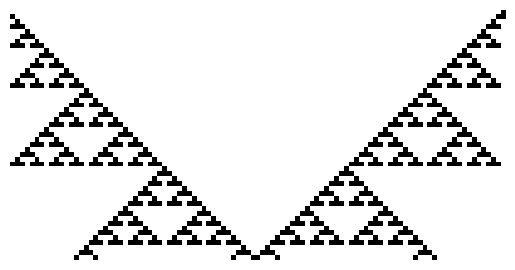

In [7]:
steps = round(n/2)
p, data = CA1D.run(rules = rule22, gridsize = n, initial_condition="singleton", nsteps=steps, update="synchronous")

### Step 4 : analyse the data

* Here we just visualise the output by plotting the array of zeros and ones at consecutive steps.

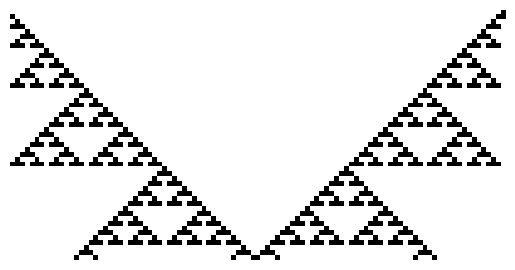

In [8]:
p

We conclude that even very simple ABMs can have very complex behaviour.

Let's try it with a random initial condition or a different rule...

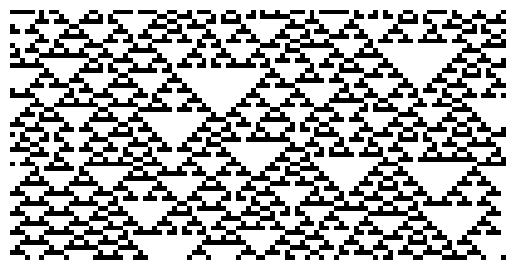

In [9]:
p, data = CA1D.run(rules = rule22, gridsize = n, initial_condition="random", nsteps=steps, update="synchronous")

## A closer look at Mesa
The CA is too simple to illustrate all the features that are present in general ABMs. In particular, the lack of distinction between the space  grid and the agents is not generic. 

`mesa` provides framework for constructing, running and analysing a broad class of ABMs. It *is* faster than writing yourself from scratch.


### Features of a general ABM

* an **agent** object with its own features
* a **model** object with its own features
* a **space** in which the agents live (in `mesa` the space is a feature of the model, "no space" is possible)
* an **agent update** function (`step` and `advance` method)
* a **model update** function (a `step` method)

### Overview of the Mesa library 
https://mesa.readthedocs.io/stable/overview.html

### Data types in the Mesa framework

Mesa is built on a few core classes: `mesa.Model`, `mesa.Agent`, and `mesa.space`.

## Example 1: the 1D CA "under the hood"

Let's look at how the code for the 1D CA above fits into this framework.

There are lots of other examples in the `mesa` documentation.

### Step 1 : defining the agent, space and model objects

Agents are always defined as classes inheriting from `mesa.Agent`. Depending on the space, the agent's `pos` attribute will be handled by the grid.

In [10]:
# In Mesa, an agent is a class that inherits from mesa.Agent.
# The 'unique_id' for agents is automatically assigned.
# The agent's 'pos' attribute will be handled by the grid.
class CA1DAgent(mesa.Agent):
    def __init__(self, model, state=0):
        super().__init__(model)
        self.state = state

### Step 1 : defining the agent, space and model objects

The space in this case is a 1D grid. In `mesa` we can use a `SingleGrid` with height 1.

In [11]:
gridsize = 101
space = mesa.space.SingleGrid(width=gridsize, height=1, torus=True)

### Step 1 : defining the agent, space and model objects

The model incorporates the agent, the space and any additional properties needed to specify the model.

In our case, the only additional properties the model needs is the rules that we have defined above

In [12]:
class CA1DModel(mesa.Model):
    def __init__(self, gridsize, rules, seed=None):
        super().__init__(seed=seed)
        self.num_agents = gridsize
        self.grid = mesa.space.SingleGrid(gridsize, 1, torus=True)
        self.rules = rules
        # ... agent creation ...

# Instantiation:
model = CA1DModel(gridsize=101, rules=rule110)

### Step 1 : defining the agent, space and model objects

After creating the model, we now need to add the agents to it. In this case, there is an agent at each point on the grid. Let's start off with all of them set to state 0 except for the last one:


In [13]:
# This logic is inside the model's __init__ method.
# CA1DAgent.create_agents(self, self.num_agents, state=0)
# for i in range(self.num_agents):
#     self.grid.place_agent(self.agents[i], (i, 0))
#
# self.agents[self.num_agents - 1].state = 1
print("See the CA1DModel definition for the implementation.")

See the CA1DModel definition for the implementation.


### Aside: Using a function to initialise an ABM

It is a good idea to package all of this together into a single function to initialise an ABM. In Python, this is naturally done with the class constructor (`__init__`).

In [14]:
# In Python, this is handled in the model's constructor.
class CA1DModel(mesa.Model):
    def __init__(self, gridsize, rules, seed=None):
        super().__init__(seed=seed)
        self.num_agents = gridsize
        self.grid = mesa.space.SingleGrid(gridsize, 1, torus=True)
        self.rules = rules

        # Create agents
        CA1DAgent.create_agents(self, self.num_agents, state=0)
        for i in range(self.num_agents):
            self.grid.place_agent(self.agents[i], (i, 0))

        self.agents[self.num_agents - 1].state = 1

### Step 2 : defining the agent update function

This is where all of the action takes place:

In [15]:
# This corresponds to the step() and advance() methods of our Agent class for synchronous updates.
class CA1DAgent(mesa.Agent):
    def __init__(self, model, state=0):
        super().__init__(model)
        self.state = state
        self.next_state = None

    def step(self):
        x, y = self.pos
        
        left_pos = self.model.grid.torus_adj((x - 1, y))
        right_pos = self.model.grid.torus_adj((x + 1, y))
        
        left_agent = self.model.grid.get_cell_list_contents([left_pos])[0]
        right_agent = self.model.grid.get_cell_list_contents([right_pos])[0]
        
        rule_index_str = str(left_agent.state) + str(self.state) + str(right_agent.state)
        
        self.next_state = self.model.rules[rule_index_str]

    def advance(self):
        self.state = self.next_state

### Step 3 : running the model and extracting data

`mesa`'s data collection can be done with a DataCollector or manually. Here's a manual way to get a DataFrame.

In [16]:
nsteps = 50
model = CA1DModel(gridsize=101, rules=rule110)

# Mesa's data collection can be done with a DataCollector or manually.
# Here's a manual way to get a DataFrame.
agent_data = []
for i in range(nsteps + 1):
    for agent in model.agents:
        agent_data.append({
            "step": i,
            "id": agent.unique_id,
            "pos": agent.pos,
            "state": agent.state
        })
    for agent in model.agents: # sequential asynchronous update
        agent.step()
        agent.advance()

data = pd.DataFrame(agent_data)

In [17]:
data.iloc[1000:1030]

,step,id,pos,state
1000,9,92,"(91, 0)",1
1001,9,93,"(92, 0)",1
1002,9,94,"(93, 0)",1
1003,9,95,"(94, 0)",1
1004,9,96,"(95, 0)",1
1005,9,97,"(96, 0)",1
1006,9,98,"(97, 0)",1
1007,9,99,"(98, 0)",1
1008,9,100,"(99, 0)",1
1009,9,101,"(100, 0)",1


In [18]:
data.to_csv("data.csv", index=False)

In [19]:
# Process the data into a simple array for plotting
A = np.zeros((nsteps + 1, model.grid.width), dtype=int)
for i in range(nsteps + 1):
    step_data = data[data['step'] == i]
    for _, row in step_data.iterrows():
        # pos is a tuple (x,y), we only need x
        A[i, row['pos'][0]] = row['state']

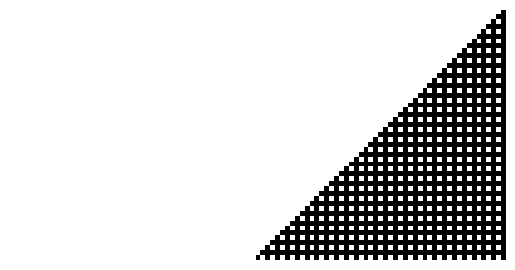

In [20]:
plt.imshow(A, cmap='gray_r', interpolation='nearest')
plt.axis('off')
plt.show()

### Synchronous vs asynchronous update - defining a model update function

What happened? We need our model to update synchronously. This is done in `mesa` with the AgentSet functionality and the `Model.step` method.

In [21]:
# Synchronous updates are handled in Mesa by using the AgentSet functionality and the Model.step method.

# The agent's `step()` method calculates the next state.
# The agent's `advance()` method applies it.
# The Model.step() calls `step()` on all agents, then `advance()` on all agents.
class CA1DModel(mesa.Model):
    def __init__(self, gridsize, rules, seed=None, initial_condition="singleton"):
        super().__init__(seed=seed)
        self.num_agents = gridsize
        self.grid = mesa.space.SingleGrid(gridsize, 1, torus=True)
        self.rules = rules

        # Create agents
        CA1DAgent.create_agents(self, self.num_agents, state=0)
        for i in range(self.num_agents):
            self.grid.place_agent(self.agents[i], (i, 0))

        if initial_condition == "singleton":
            self.agents[self.num_agents - 1].state = 1
        elif initial_condition == "random":
            for agent in self.agents:
                agent.state = self.random.choice([0, 1])

    def step(self):
        self.agents.do("step")
        self.agents.do("advance")

### Synchronous vs asynchronous update - defining a model update function

Now run again. Our `CA1D.run` function already does this correctly.

In [22]:
nsteps = 50
update = "synchronous"

model = CA1DModel(gridsize=101, rules=rule110, initial_condition="singleton")

data = np.zeros((nsteps + 1, gridsize), dtype=int)
data[0, :] = [agent.state for agent in model.agents]

for i in range(nsteps):
    if update == "synchronous":
        model.step()
    else: # sequential
        for agent in model.agents:
            agent.step()
            agent.advance()

    data[i + 1, :] = [agent.state for agent in model.agents]

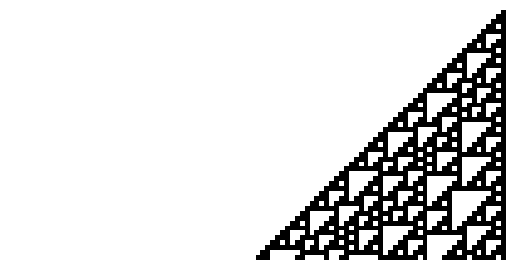

In [23]:
plt.imshow(data, cmap='gray_r', interpolation='nearest')
plt.axis('off')
plt.show()

In [24]:
# The data array 'data' is also returned
print(data)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 0 1]]


### Aside: Running an ABM inside a function

As with initialisation, it can be helpful to wrap these commands into a single function that just returns the relevant data. Our `CA1D.run` function already does this.

In [25]:
# Our CA1D.run function encapsulates the initialisation, running, and plotting.
def run(rules, gridsize, nsteps, initial_condition, update="synchronous"):
    model = CA1DModel(gridsize=gridsize, rules=rules, initial_condition=initial_condition)
    # ... run loop ...
    # ... plotting ...
    # return fig, data

print("See the definition of CA1D.run for the full implementation.")

See the definition of CA1D.run for the full implementation.


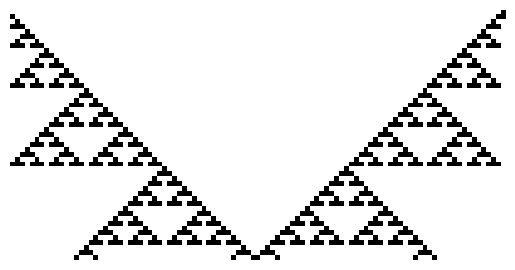

In [26]:
p, _ = CA1D.run(rules = rule22, gridsize=101, nsteps = 50, initial_condition="singleton")